In [139]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import joblib as jl
import pickle


In [140]:
df="CAR_DETAILS.csv"
df=pd.read_csv(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [141]:
print("Null values in dataset: ",df.isnull().count().sum())
print("Duplicate values in dataset: ",df.duplicated().sum())
df1=df.drop_duplicates()
print("Duplicate values in dataset: ",df1.duplicated().sum())

Null values in dataset:  34720
Duplicate values in dataset:  763
Duplicate values in dataset:  0


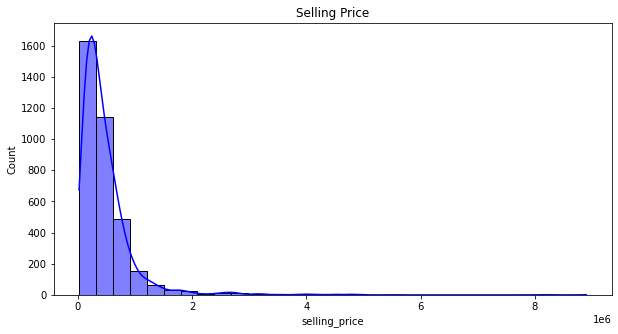

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [142]:
plt.figure(figsize=(10,5))
sns.histplot(df1["selling_price"],kde=True,bins=30,color='blue')
plt.title("Selling Price")
plt.show()
df1.info()

C:\Users\rolka\AppData\Local\Temp/ipykernel_2840/3714500555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])
C:\Users\rolka\AppData\Local\Temp/ipykernel_2840/3714500555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = le.fit_transform(df2[col])
C:\Users\rolka\AppData\Local\Temp/ipykernel_2840/3714500555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

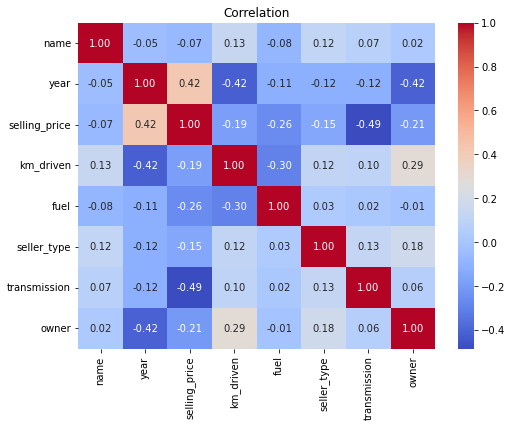

In [143]:
df2=df1
df3=df2.select_dtypes(include=['object']).columns

label = {}
for col in df3:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label[col] = le
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation")
plt.show()

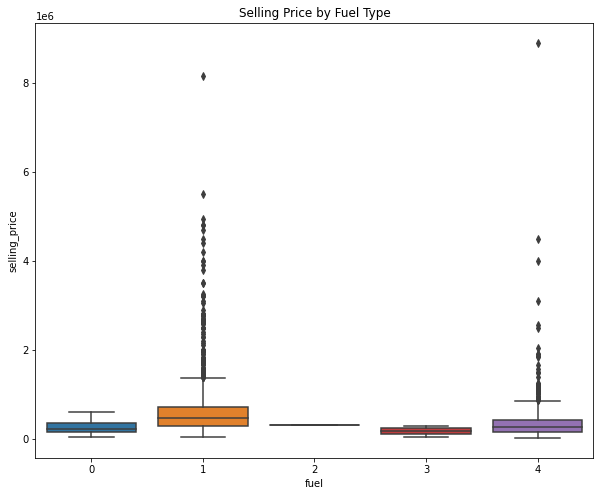

In [144]:
plt.figure(figsize=(10,8))
sns.boxplot( y='selling_price',x="fuel",data=df1)
plt.title("Selling Price by Fuel Type")
plt.show()

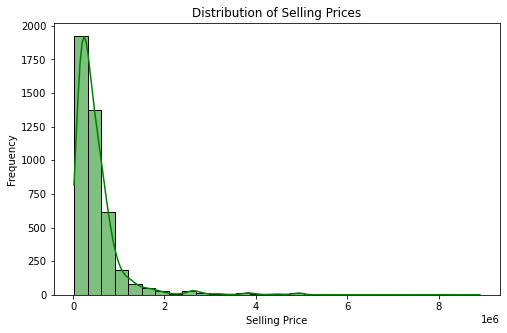

In [145]:
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True, color='green', bins=30)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

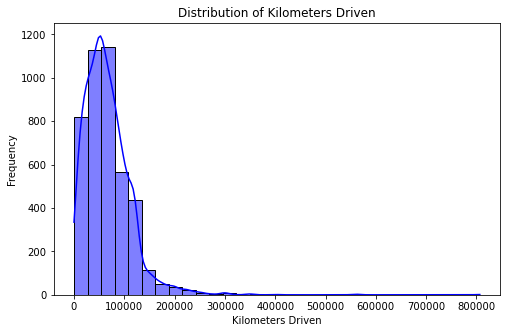

In [146]:
plt.figure(figsize=(8, 5))
sns.histplot(df['km_driven'], kde=True, color='blue', bins=30)
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Frequency")
plt.show()

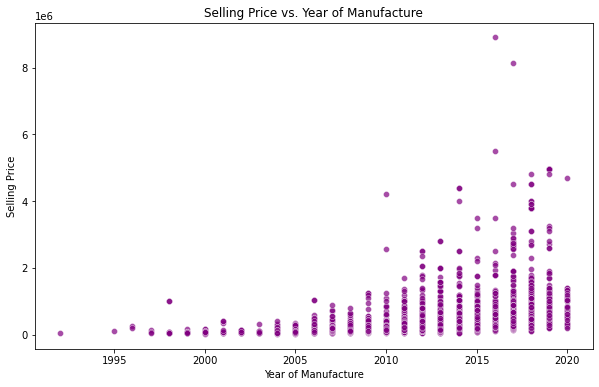

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.7, color='purple')
plt.title("Selling Price vs. Year of Manufacture")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

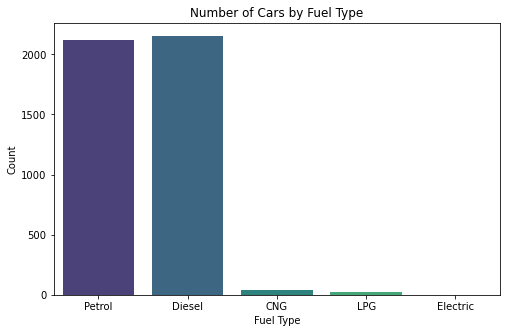

In [148]:
# Count plot for fuel types
plt.figure(figsize=(8, 5))
sns.countplot(x='fuel', data=df, palette='viridis')
plt.title("Number of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

In [149]:
num=["km_driven","year",'selling_price']
cate=["seller_type","owner","fuel","transmission"]

scale=StandardScaler()
scaled=scale.fit_transform(df1[num])

le = LabelEncoder()
for col in cate:
    df1[col] = le.fit_transform(df1[col])

print(df1.head())

   name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0   775  2007          60000      70000     4            1             1   
1  1041  2007         135000      50000     4            1             1   
2   505  2012         600000     100000     1            1             1   
3   118  2017         250000      46000     4            1             1   
4   279  2014         450000     141000     1            1             1   

   owner  
0      0  
1      0  
2      0  
3      0  
4      2  


C:\Users\rolka\AppData\Local\Temp/ipykernel_2840/1904583186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])
C:\Users\rolka\AppData\Local\Temp/ipykernel_2840/1904583186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.fit_transform(df1[col])
C:\Users\rolka\AppData\Local\Temp/ipykernel_2840/1904583186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [150]:
x_s=df1.drop('selling_price',axis=1)
y = df1['selling_price']
col_names=x_s.columns
x=pd.DataFrame(x_s,columns=col_names)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [151]:
def reg_eval(y,ypred):
    print('MAE',mean_absolute_error(y,ypred))
    print('MSE',mean_squared_error(y,ypred))
    print('RMSE',np.sqrt(mean_squared_error(y,ypred)))
    print('R2 score',r2_score(y,ypred))
    print('\n')

def model_score(model):
  print('Training Score',model.score(x_train,y_train))
  print('Testing Score',model.score(x_test,y_test))

In [152]:
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)

ypred1=model_lin.predict(x_test)

print('Evalutaing the Model\n')
reg_eval(y_test,ypred1)
model_score(model_lin)

Evalutaing the Model

MAE 214911.47567333656
MSE 198263378271.3503
RMSE 445267.7601975583
R2 score 0.38453011616834676


Training Score 0.4417121615354437
Testing Score 0.38453011616834676


In [153]:
model_knn=KNeighborsRegressor(n_neighbors=11)
model_knn.fit(x_train,y_train)

ypred2=model_knn.predict(x_test)

print('Evalutaing the Model\n')
reg_eval(y_test,ypred2)
model_score(model_knn)

Evalutaing the Model

MAE 286402.8268156425
MSE 313877317460.1058
RMSE 560247.5501598429
R2 score 0.02562925236668534


Training Score 0.24694732402801545
Testing Score 0.02562925236668534


In [154]:
model_ridge=Ridge(alpha=0.5)
model_ridge.fit(x_train,y_train)
ypred4=model_ridge.predict(x_test)

print('Evalutaing the Model\n')
reg_eval(y_test,ypred4)
model_score(model_ridge)

Evalutaing the Model

MAE 214859.13871065824
MSE 198259256201.2648
RMSE 445263.13141923706
R2 score 0.38454291232878135


Training Score 0.4417111458800601
Testing Score 0.38454291232878135


In [155]:
pickle.dump(model_knn,open("Car_price_predict.pkl",'wb'))

loaded=pickle.load(open('Car_price_predict.pkl','rb'))

In [156]:
sample= df1.sample(20,random_state=42)

print("Training Features:", x.shape[1])
print("Sample Features:", df1.shape[1])
print(x.columns)



sample_predictions = loaded.predict(x)
print("Predicted Prices:", sample_predictions)

Training Features: 7
Sample Features: 8
Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner'],
      dtype='object')
Predicted Prices: [207636.27272727 225909.09090909 409545.45454545 ... 347363.63636364
 440727.18181818 419545.36363636]


In [157]:
prediction= loaded.predict(x)
print("Prediction is : ",prediction)

Prediction is :  [207636.27272727 225909.09090909 409545.45454545 ... 347363.63636364
 440727.18181818 419545.36363636]
